In [24]:
import sys
sys.path.insert(0, '..')
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
from mxnet.gluon import data as gdata
import sys
import time
from mxnet import gluon, init, autograd
from mxnet.gluon import loss as gloss, nn
import mxnet as mx
import numpy as np
import mxnet as mx
from mxnet import nd, autograd, gluon

In [25]:
mnist_train = gdata.vision.CIFAR10(train=True)
mnist_test = gdata.vision.CIFAR10(train=False)
len(mnist_train), len(mnist_test)

(50000, 10000)

In [26]:
feature, label = mnist_train[0]
feature.shape, feature.dtype

((32, 32, 3), numpy.uint8)

In [27]:
label, type(label), label.dtype

(6, numpy.int32, dtype('int32'))

In [28]:
def get_fashion_mnist_labels(labels):
   text_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
   'dog', 'frog', 'horse', 'ship', 'truck']
   return [text_labels[int(i)] for i in labels]

In [29]:
def show_mnist(images, labels):
   display.get_fashion_mnist_labels('svg')
   # Here _ means that we ignore (not use) variables
   _, figs = plt.subplots(1, len(images), figsize=(12, 12))
   for f, img, lbl in zip(figs, images, labels):
       f.imshow(img.reshape((28, 28)).asnumpy())
       f.set_title(lbl)
       f.axes.get_xaxis().set_visible(False)
       f.axes.get_yaxis().set_visible(False)

In [30]:
X, y = mnist_train[0:9]
# show_mnist(X, get_mnist_labels(y))

In [31]:
batch_size = 2
transformer = gdata.vision.transforms.ToTensor()
if sys.platform.startswith('win'):
    num_workers = 0
else:
    num_workers = 4
train_iter = gdata.DataLoader(mnist_train.transform_first(transformer),
   batch_size, shuffle=True,
   num_workers=num_workers)
test_iter = gdata.DataLoader(mnist_test.transform_first(transformer),
   batch_size, shuffle=False,
   num_workers=num_workers)


In [32]:
start = time.time()
for X, y in train_iter:
    continue
'%.2f sec' % (time.time() - start)

'5.50 sec'

In [33]:
#Initialize the Model
def init(net, optimizer='sgd', learning_rate=0.00001, weight_decay=1e-6, ctx=mx.cpu()):
   net.collect_params().initialize(mx.init.Xavier(magnitude=2.24), ctx=ctx)
   trainer = gluon.Trainer(net.collect_params(),
                           optimizer,
                           {'learning_rate': learning_rate, 'wd': weight_decay})
   return trainer

In [34]:
# Computing Accuracy
def accuracy(data_iterator, net,ctx=mx.cpu()):
   acc = mx.metric.Accuracy()
   for (data, label) in data_iterator:
       data = data.as_in_context(ctx)
       label = label.as_in_context(ctx)
       output = net(data)
       predictions = mx.nd.argmax(output, axis=1)
       acc.update(preds=predictions, labels=label)
   return acc.get()[1]

In [35]:
#Training the Model
def train(net, trainer, train_data, validation_data, epochs, ctx=mx.cpu()):
   training_accuracies = []
   validation_accuracies = []
   softmax_cross_entropy = gluon.loss.SoftmaxCrossEntropyLoss()
   for e in range(epochs):
       tic = time.time()
       for (data, label) in train_data:
           data  = data.as_in_context(ctx)
           label = label.as_in_context(ctx)
           with autograd.record():
               output = net(data)
               loss = softmax_cross_entropy(output, label)
               loss.backward()
           trainer.step(data.shape[0])
       toc = time.time()
       train_accuracy = accuracy(train_data, net)
       training_accuracies.append(train_accuracy)
       validation_accuracy = accuracy(validation_data, net)
       validation_accuracies.append(validation_accuracy)
       print("Epoch#%d Time=%.2f Training=%.4f Validation=%.4f Diff=%.4f"
             % (e, toc-tic, train_accuracy, validation_accuracy, train_accuracy-validation_accuracy))
   return training_accuracies, validation_accuracies

In [36]:
#Plotting
def plot_accuracies(training_accuracies, validation_accuracies):
   epochs = len(training_accuracies)
   plt.clf()
   fig, ax = plt.subplots()
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   train_plot, = ax.plot(range(epochs), training_accuracies, label="Training accuracy")
   validation_plot, = ax.plot(range(epochs), validation_accuracies, label="Validation accuracy")
   plt.legend(handles=[train_plot,validation_plot])
   plt.xticks(np.arange(0, epochs, 5))
   ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.4f'))
   plt.show()

Epoch#0 Time=26.26 Training=0.2157 Validation=0.2078 Diff=0.0079
Epoch#1 Time=25.78 Training=0.2605 Validation=0.2541 Diff=0.0064
Epoch#2 Time=25.45 Training=0.2844 Validation=0.2832 Diff=0.0012
Epoch#3 Time=26.14 Training=0.2956 Validation=0.2910 Diff=0.0046
Epoch#4 Time=25.35 Training=0.3104 Validation=0.3057 Diff=0.0047
Epoch#5 Time=25.12 Training=0.3149 Validation=0.3102 Diff=0.0047
Epoch#6 Time=25.06 Training=0.3242 Validation=0.3211 Diff=0.0031
Epoch#7 Time=26.42 Training=0.3288 Validation=0.3251 Diff=0.0037
Epoch#8 Time=25.50 Training=0.3340 Validation=0.3312 Diff=0.0028
Epoch#9 Time=25.99 Training=0.3390 Validation=0.3365 Diff=0.0025
Epoch#10 Time=28.77 Training=0.3401 Validation=0.3357 Diff=0.0044
Epoch#11 Time=32.71 Training=0.3421 Validation=0.3410 Diff=0.0011
Epoch#12 Time=46364.80 Training=0.3398 Validation=0.3409 Diff=-0.0011
Epoch#13 Time=29.91 Training=0.3482 Validation=0.3451 Diff=0.0031
Epoch#14 Time=25.72 Training=0.3499 Validation=0.3460 Diff=0.0039
Epoch#15 Time=25

<Figure size 432x288 with 0 Axes>

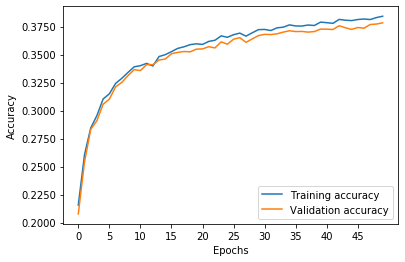

In [37]:
net = nn.Sequential()
net.add(nn.Dense(10))
trainer = init(net)
training_accuracies, validation_accuracies = train(net, trainer, train_iter, test_iter, 50)
plot_accuracies(training_accuracies, validation_accuracies)